# Import  Libraries

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read Data

In [3]:
score=pd.read_csv("score_updated.csv")

#  EDA

In [4]:
score.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
score.shape

(96, 2)

In [6]:
score.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [8]:
score.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [9]:
score.isnull().sum()

Hours     0
Scores    0
dtype: int64

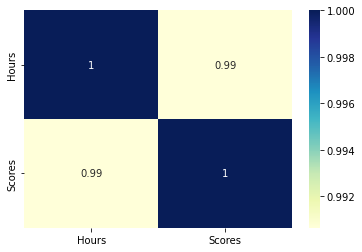

In [10]:
score_hm= sns.heatmap(score.corr(), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Hours Vs Scores')

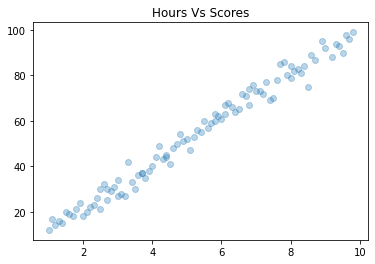

In [11]:
X=score['Hours']
y=score['Scores']

plt.scatter(X, y, alpha=0.3,
            cmap='viridis')
plt.title('Hours Vs Scores')

In [12]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

# Spliting Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [15]:
y_pred = model.predict(X_test)

# Ketepatan Model

In [16]:
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)

In [17]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 14.603843075774599
r square : 0.9768183341385437


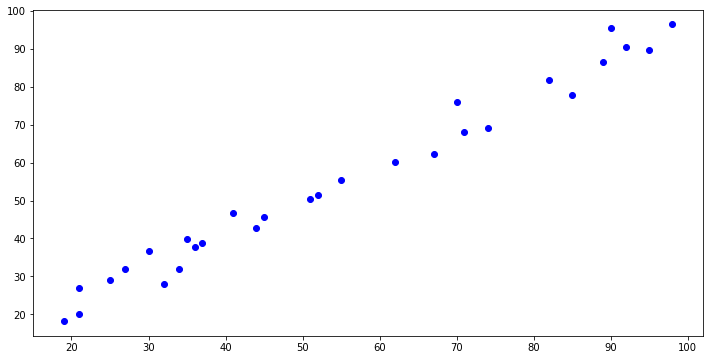

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='b',linestyle='-')
plt.show()

In [19]:
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)

Intercept of the model: [2.6766702]
Coefficient of the line: [[9.75701337]]


#  Y=2.6766702 + 9.75701337(Hours)